## Analysis of sub-reddits present in `Subreddit of the day`

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load dataset
file_path = 'subredditoftheday_reddit.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,title,score,id,subreddit,url,num_comments,body,created,timestamp
0,Join the official /r/SubredditOfTheDay Discord!,44,8jf2yn,subredditoftheday,https://discord.gg/FBZQu58,30,NaN,1.526326e+09,2018-05-14 21:26:55
1,"September 2nd, 2021 - /r/gallifreyan: and sudd...",202,pgif2m,subredditoftheday,https://www.reddit.com/r/subredditoftheday/com...,17,## r/gallifreyan\n**7329** *Whovians* for **9 ...,1.630591e+09,2021-09-02 15:58:04
2,"August 26th, 2021 - /r/pocketsand: Repost Augu...",271,pc54p9,subredditoftheday,https://www.reddit.com/r/subredditoftheday/com...,1,"#/r/pocketsand\n\n**46,500** readers for **9 y...",1.630002e+09,2021-08-26 20:12:06
3,"August 24th, 2021 - /r/cospenis: Disneyland fo...",429,payn7b,subredditoftheday,https://www.reddit.com/r/subredditoftheday/com...,63,"##r/cospenis\n\n**27,483** *penis costume love...",1.629847e+09,2021-08-25 01:08:59
4,"August 6th, 2021 - /r/WildArt: Artwork depicti...",179,ozh7wy,subredditoftheday,https://www.reddit.com/r/subredditoftheday/com...,12,"#### /r/wildart\n\n\n**4,377** *admirers of na...",1.628289e+09,2021-08-07 00:35:24


### Data Cleaning and Preprocessing

Following things are to be done in the Data Cleaning and Preprocessing steps
1. Check for missing Values
2. Drop rows with any missing value
3. Extract subreddit from the `title` column and put it in the `subreddit` column

- Note: the current data has subredditoftheday in the subreddit column so we need to extract the value from title column as in step 3

In [25]:
# Check for missing values
missing_values = data.isnull().sum()

# Drop rows with any missing values
data_cleaned = data.dropna()

# Display the shape of the cleaned dataset
cleaned_shape = data_cleaned.shape


# Function to extract subreddit name from the title
def extract_subreddit(title):
    import re
    match = re.search(r'/r/(\w+)', title)
    return f'/r/{match.group(1)}' if match else None

# Apply the function to the title column to create a new subreddit column
data['subreddit'] = data['title'].apply(extract_subreddit)

missing_values, cleaned_shape
data

,title,score,id,subreddit,url,num_comments,body,created,timestamp
0,Join the official /r/SubredditOfTheDay Discord!,44,8jf2yn,/r/SubredditOfTheDay,https://discord.gg/FBZQu58,30,NaN,1.526326e+09,2018-05-14 21:26:55
1,"September 2nd, 2021 - /r/gallifreyan: and sudd...",202,pgif2m,/r/gallifreyan,https://www.reddit.com/r/subredditoftheday/com...,17,## r/gallifreyan\n**7329** *Whovians* for **9 ...,1.630591e+09,2021-09-02 15:58:04
2,"August 26th, 2021 - /r/pocketsand: Repost Augu...",271,pc54p9,/r/pocketsand,https://www.reddit.com/r/subredditoftheday/com...,1,"#/r/pocketsand\n\n**46,500** readers for **9 y...",1.630002e+09,2021-08-26 20:12:06
3,"August 24th, 2021 - /r/cospenis: Disneyland fo...",429,payn7b,/r/cospenis,https://www.reddit.com/r/subredditoftheday/com...,63,"##r/cospenis\n\n**27,483** *penis costume love...",1.629847e+09,2021-08-25 01:08:59
4,"August 6th, 2021 - /r/WildArt: Artwork depicti...",179,ozh7wy,/r/WildArt,https://www.reddit.com/r/subredditoftheday/com...,12,"#### /r/wildart\n\n\n**4,377** *admirers of na...",1.628289e+09,2021-08-07 00:35:24
...,...,...,...,...,...,...,...,...,...
994,"November 29th, 2017 - /r/ATBGE: When fine craf...",431,7gd2n5,/r/ATBGE,https://www.reddit.com/r/subredditoftheday/com...,5,"####/r/ATBGE \n\n\n**311, 372** subscribers fo...",1.511960e+09,2017-11-29 14:00:37
995,"November 28th, 2017 - /r/DemocracyExperiment: ...",200,7g3yza,/r/DemocracyExperiment,https://www.reddit.com/r/subredditoftheday/com...,13,### /r/DemocracyExperiment\n\n\n\n**267** Citi...,1.511874e+09,2017-11-28 14:00:36
996,"November 27th, 2017 - /r/de: Reddit in German",440,7fv021,/r/de,https://www.reddit.com/r/subredditoftheday/com...,60,"#### /r/de\n\n**81,954** Leser for **11 Year...",1.511788e+09,2017-11-27 14:00:37
997,"November 26th, 2017 - /r/Geoism: Conquer the w...",140,7fmra0,/r/Geoism,https://www.reddit.com/r/subredditoftheday/com...,12,"####/r/Geosim \n\n**1,096** political revolut...",1.511701e+09,2017-11-26 14:00:37


### Sentiment Analysis

Sentiment analysis on the comments of all the subreddits combined

In [26]:
# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment function to the 'body' column
data_cleaned['sentiment'] = data_cleaned['body'].apply(get_sentiment)

# Categorize sentiments
data_cleaned['sentiment_category'] = pd.cut(data_cleaned['sentiment'], 
                                            bins=[-1, -0.1, 0.1, 1], 
                                            labels=['Negative', 'Neutral', 'Positive'])

# Display sentiment distribution
sentiment_distribution = data_cleaned['sentiment_category'].value_counts()

sentiment_distribution


/var/folders/9t/l18tk7ds1vx4m9tgjfym7ct00000gn/T/ipykernel_25465/3582726058.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment'] = data_cleaned['body'].apply(get_sentiment)
/var/folders/9t/l18tk7ds1vx4m9tgjfym7ct00000gn/T/ipykernel_25465/3582726058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment_category'] = pd.cut(data_cleaned['sentiment'],


sentiment_category
Positive    700
Neutral     243
Negative     23
Name: count, dtype: int64

Plotting the results

/var/folders/9t/l18tk7ds1vx4m9tgjfym7ct00000gn/T/ipykernel_25465/2288491721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='sentiment_category', palette='viridis')


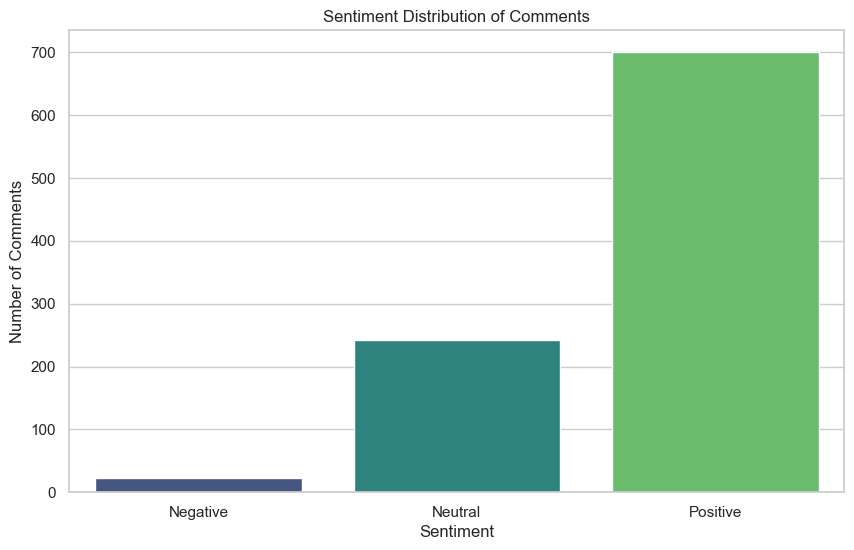

In [27]:
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='sentiment_category', palette='viridis')
plt.title('Sentiment Distribution of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()


### Categorising the sub-reddits based on score

1. Finding range for High Score, Medium Score and Low Score

In [33]:
# Calculate summary statistics for scores
score_summary = data_cleaned['score'].describe()
score_summary

count      966.000000
mean       260.164596
std        943.749126
min          0.000000
25%        123.250000
50%        167.000000
75%        257.750000
max      20394.000000
Name: score, dtype: float64

In [34]:
# Calculate percentiles
percentiles = data_cleaned['score'].quantile([0.25, 0.75])
low_cutoff = percentiles[0.25]
high_cutoff = percentiles[0.75]

low_cutoff, high_cutoff

(np.float64(123.25), np.float64(257.75))

2. Plotting Sentiments of sub-reddits on the basis of score

/var/folders/9t/l18tk7ds1vx4m9tgjfym7ct00000gn/T/ipykernel_25465/1988113345.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['score_level'] = data_cleaned['subreddit'].map(subreddit_avg_scores).apply(categorize_score)


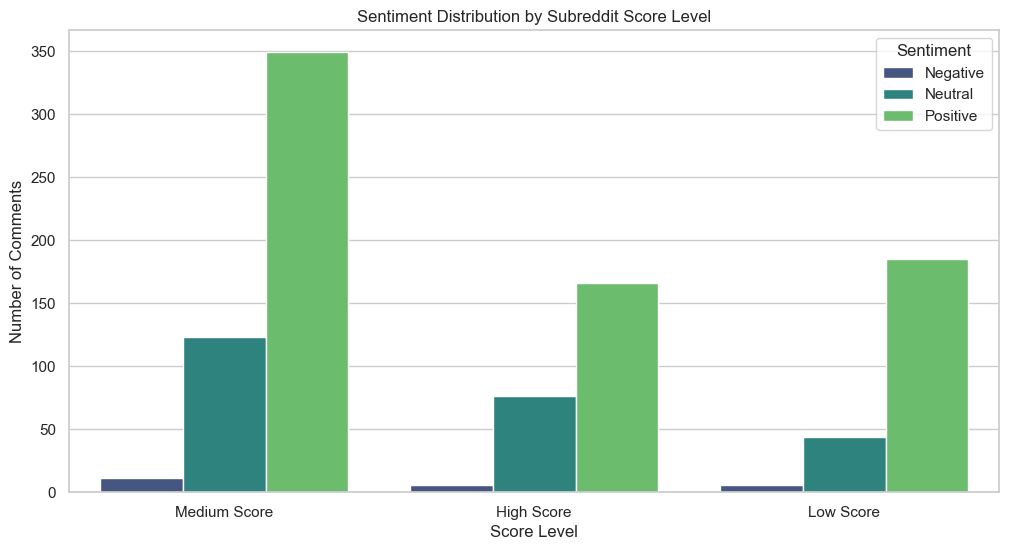

In [35]:
# Define score levels based on percentiles
def categorize_score(avg_score):
    if avg_score >= high_cutoff:
        return 'High Score'
    elif avg_score < low_cutoff:
        return 'Low Score'
    else:
        return 'Medium Score'

# Calculate average score per subreddit
subreddit_avg_scores = data_cleaned.groupby('subreddit')['score'].mean()

# Apply score categorization
data_cleaned['score_level'] = data_cleaned['subreddit'].map(subreddit_avg_scores).apply(categorize_score)

# Plot sentiment distribution by score level
plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='score_level', hue='sentiment_category', palette='viridis')
plt.title('Sentiment Distribution by Subreddit Score Level')
plt.xlabel('Score Level')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment')
plt.show()

### Finding correlation between Score and Sentiment

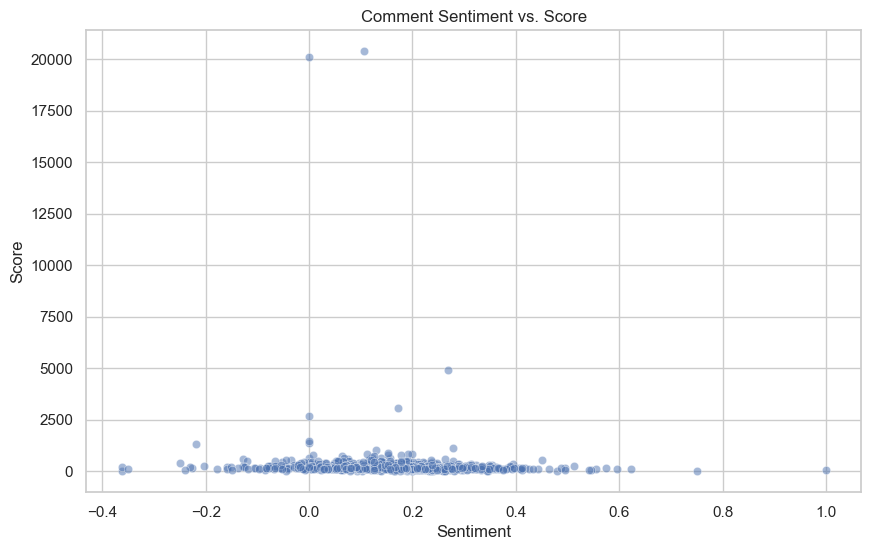

Correlation between sentiment and score: -0.07


In [39]:
# Plot sentiment vs. score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='sentiment', y='score', alpha=0.5)
plt.title('Comment Sentiment vs. Score')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.show()

# Calculate correlation coefficient
correlation = data_cleaned[['sentiment', 'score']].corr().iloc[0, 1]
print(f'Correlation between sentiment and score: {correlation:.2f}')

The correlation coefficient quantifies the strength and direction of this relationship
`-0.7` i.e -ve means that positive comments tend to have lower score.

Potential Reasons:
- **Engagement with Criticism**: Users might find critical comments more engaging, leading to more upvotes
- **Issue Highlighting**: Negative comments may highlight issues or problems more effectively, leading to more upvotes


### Top subreddits based on average comment length 

/var/folders/9t/l18tk7ds1vx4m9tgjfym7ct00000gn/T/ipykernel_25465/57154264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['comment_length'] = data_cleaned['body'].apply(len)


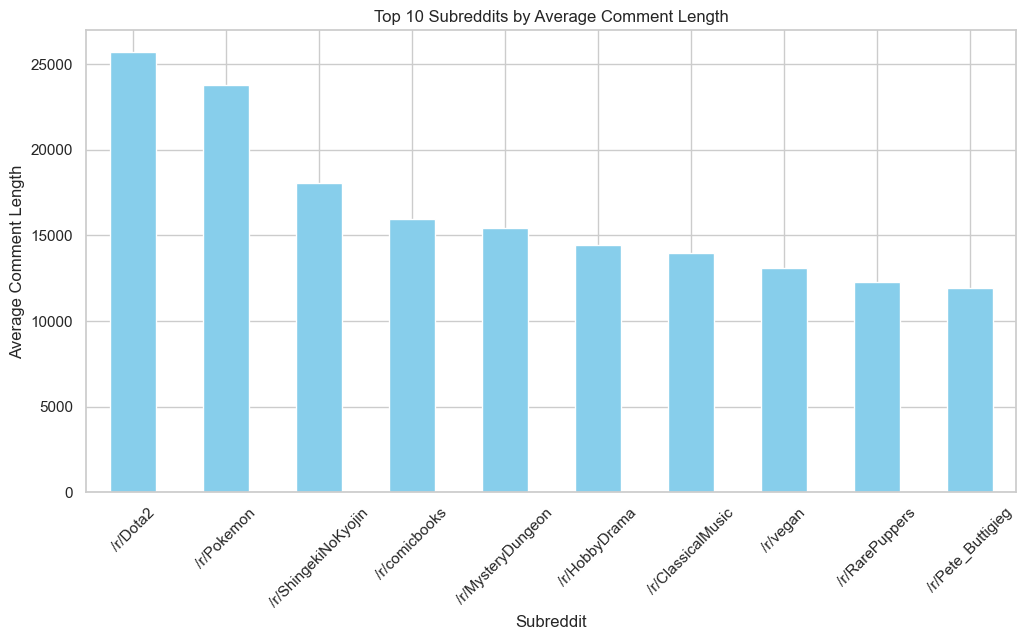

In [38]:
# Calculate average comment length per subreddit
data_cleaned['comment_length'] = data_cleaned['body'].apply(len)
avg_comment_length_per_subreddit = data_cleaned.groupby('subreddit')['comment_length'].mean().sort_values(ascending=False).head(10)

# Plot average comment length for top subreddits
plt.figure(figsize=(12, 6))
avg_comment_length_per_subreddit.plot(kind='bar', color='skyblue')
plt.title('Top 10 Subreddits by Average Comment Length')
plt.xlabel('Subreddit')
plt.ylabel('Average Comment Length')
plt.xticks(rotation=45)
plt.show()

### Calculating the common words in the top 10 subreddits by avg comment length

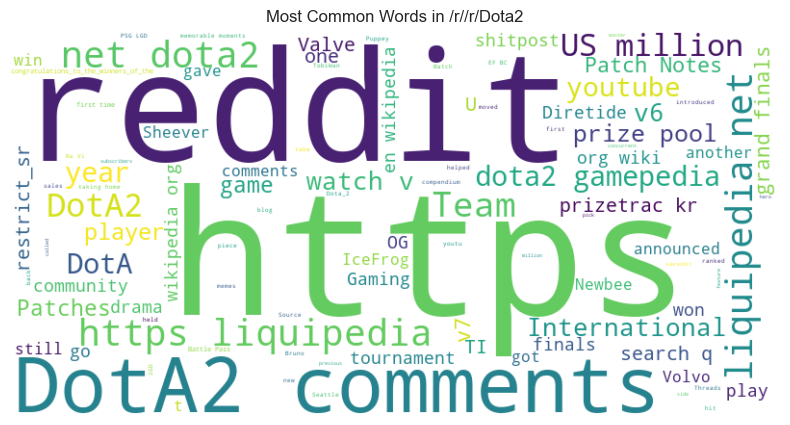

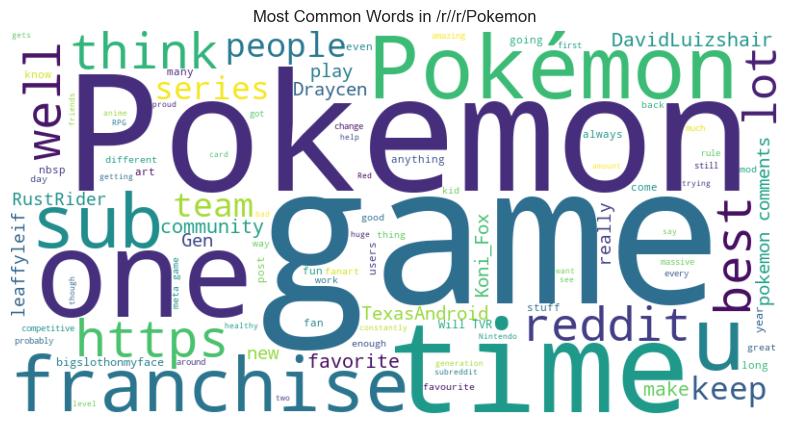

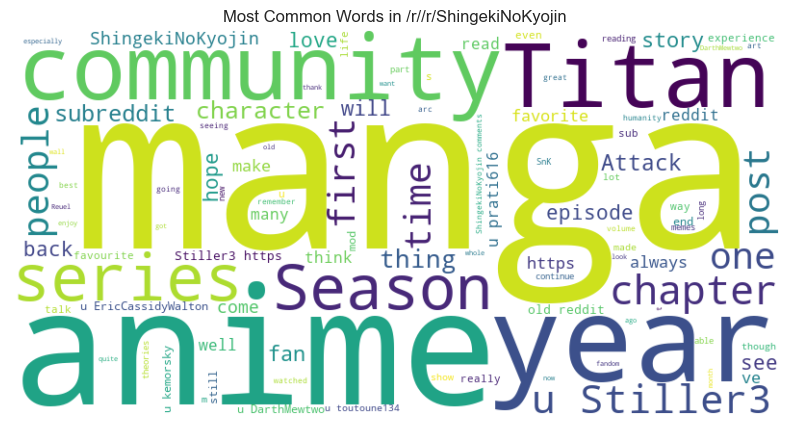

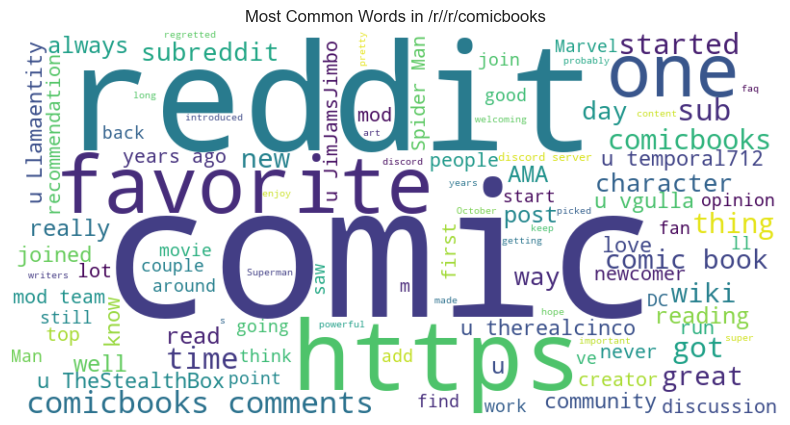

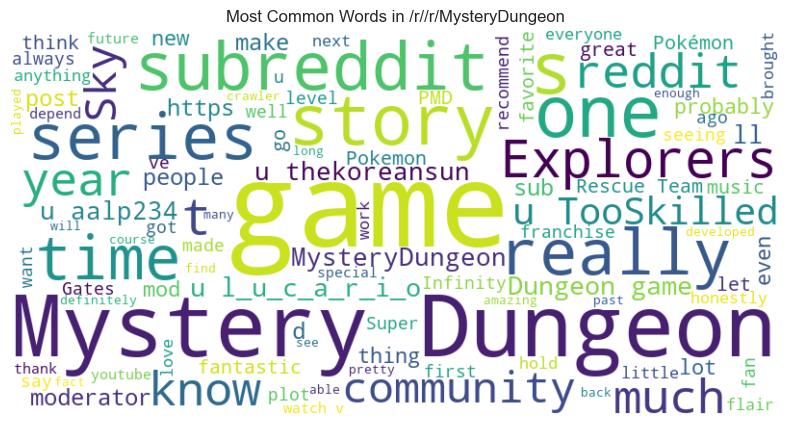

In [46]:
from collections import Counter
from wordcloud import WordCloud

# Function to create a word cloud for a specific subreddit
def plot_wordcloud(subreddit):
    comments = data_cleaned[data_cleaned['subreddit'] == subreddit]['body']
    combined_text = ' '.join(comments)
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(combined_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Common Words in /r/{subreddit}')
    plt.axis('off')
    plt.show()

top_10_subreddits = avg_comment_length_per_subreddit.index.tolist()
# Plot wordcloud for each of the top 10 subreddits
for subreddit in top_10_subreddits[:5]:
    plot_wordcloud(subreddit)

Some common words include
- **https** : denoting there are many links in the comments of subreddit

### Analysing Monthly posting Patterns

/var/folders/9t/l18tk7ds1vx4m9tgjfym7ct00000gn/T/ipykernel_25465/3992009736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['created_datetime'] = pd.to_datetime(data_cleaned['created'], unit='s')
/var/folders/9t/l18tk7ds1vx4m9tgjfym7ct00000gn/T/ipykernel_25465/3992009736.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_cleaned.set_index('created_datetime').resample('M').size().plot()


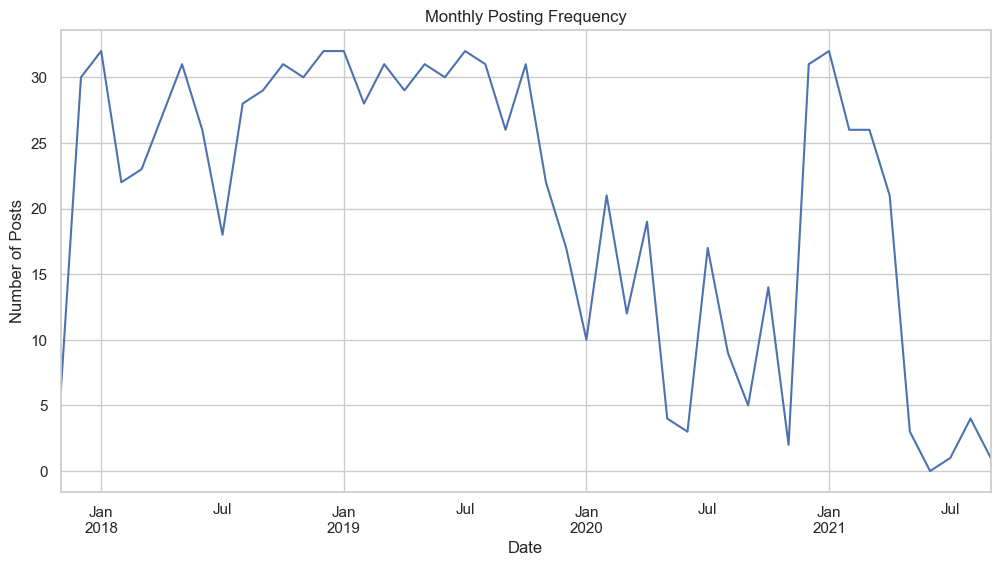

In [37]:
# Convert created_utc to datetime
data_cleaned['created_datetime'] = pd.to_datetime(data_cleaned['created'], unit='s')
# Plot posting frequency over time
plt.figure(figsize=(12, 6))
data_cleaned.set_index('created_datetime').resample('M').size().plot()
plt.title('Monthly Posting Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()